Importing libraries

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values, and standardize features
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Libraries for building and evaluating regression models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Libraries for model tuning
from sklearn.model_selection import GridSearchCV, cross_val_score

# Optional: Advanced feature selection
from sklearn.feature_selection import RFE

# Additional powerful gradient boosting frameworks
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/My Drive/colabnotebooks/Hackathon/train_dataset.csv')
train = df_train.copy()

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/colabnotebooks/Hackathon/test_dataset.csv')
test = df_test.copy()

In [ ]:
print(train.head())


   Registration Number  Annual Turnover           Cuisine       City  \
0                60001         42000000      indian,irish  Bangalore   
1                60002         50000000      indian,irish     Indore   
2                60003         32500000   tibetan,italian    Chennai   
3                60004        110000000  turkish,nigerian    Gurgaon   
4                60005         20000000     irish,belgian    Manesar   

  Restaurant Location Opening Day of Restaurant  Facebook Popularity Quotient  \
0   Near Business Hub                14-02-2009                          84.3   
1      Near Party Hub                29-09-2008                          85.4   
2   Near Business Hub                30-07-2011                          85.0   
3      Near Party Hub                30-11-2008                          85.6   
4      Near Party Hub                22-02-2010                           NaN   

        Endorsed By  Instagram Popularity Quotient  Fire Audit  ...  \
0      No

In [ ]:
# Summary statistics for numerical features
print(train.describe().T)

                                count          mean           std  \
Registration Number            3493.0  6.174700e+04  1.008487e+03   
Annual Turnover                3493.0  3.072571e+07  2.165125e+07   
Facebook Popularity Quotient   3493.0  7.796879e+01  9.690437e+00   
Instagram Popularity Quotient  3493.0  7.439900e+01  1.085234e+01   
Fire Audit                     3493.0  7.887203e-01  4.082748e-01   
Liquor License Obtained        3493.0  9.882622e-01  1.077187e-01   
Situated in a Multi Complex    3493.0  8.081878e-01  3.937825e-01   
Dedicated Parking              3493.0  8.018895e-01  3.986329e-01   
Open Sitting Available         3493.0  8.001718e-01  3.999284e-01   
Resturant Tier                 3493.0  1.927569e+00  2.592366e-01   
Restaurant Zomato Rating       3493.0  2.696536e+00  7.872713e-01   
Restaurant City Tier           3493.0  3.014601e-01  4.589577e-01   
Order Wait Time                3493.0  5.509591e+00  2.854476e+00   
Staff Responsivness            349

In [ ]:
# Summary information including non-null values and data types
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [ ]:
# Count of unique values for each categorical variable
cat_vars = train.select_dtypes(include=['object', 'category']).columns
for var in cat_vars:
    print(f"Unique count of {var}: {train[var].nunique()}")

Unique count of Cuisine: 20
Unique count of City: 297
Unique count of Restaurant Location: 2
Unique count of Opening Day of Restaurant: 1778
Unique count of Endorsed By: 3
Unique count of Restaurant Type: 4
Unique count of Restaurant Theme: 34


In [ ]:
# Count of missing values for each feature
print(train.isnull().sum())


Registration Number                 0
Annual Turnover                     0
Cuisine                             0
City                                0
Restaurant Location                 0
Opening Day of Restaurant           0
Facebook Popularity Quotient       99
Endorsed By                         0
Instagram Popularity Quotient      56
Fire Audit                          0
Liquor License Obtained             0
Situated in a Multi Complex         0
Dedicated Parking                   0
Open Sitting Available              0
Resturant Tier                     49
Restaurant Type                     0
Restaurant Theme                    0
Restaurant Zomato Rating            0
Restaurant City Tier                0
Order Wait Time                     0
Staff Responsivness                 0
Value for Money                     0
Hygiene Rating                      0
Food Rating                         0
Overall Restaurant Rating         212
Live Music Rating                 765
Comedy Gigs 

In [ ]:
# Display the first few rows of the dataset
print(test.head())


   Registration Number           Cuisine       City Restaurant Location  \
0                20001   tibetan,italian  Bangalore   Near Business Hub   
1                20002   tibetan,italian  Hyderabad      Near Party Hub   
2                20003  algerian,belgian  Hyderabad      Near Party Hub   
3                20004     tibetan,greek         -1      Near Party Hub   
4                20005     cuban,british      Pune       Near Party Hub   

  Opening Day of Restaurant  Facebook Popularity Quotient      Endoresed By  \
0                13-07-2010                         78.00  Tier A Celebrity   
1                05-09-2011                         89.17      Not Specific   
2                12-04-2011                         84.00      Not Specific   
3                16-01-2005                         79.38      Not Specific   
4                10-11-2008                         84.67      Not Specific   

   Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  ...

In [ ]:
# Summary statistics for numerical features
print(test.describe())


       Registration Number  Facebook Popularity Quotient  \
count           500.000000                    500.000000   
mean          20250.500000                     77.541240   
std             144.481833                     10.083617   
min           20001.000000                     46.000000   
25%           20125.750000                     70.575000   
50%           20250.500000                     79.000000   
75%           20375.250000                     85.232500   
max           20500.000000                     96.800000   

       Instagram Popularity Quotient  Fire Audit  Liquor License Obtained  \
count                     500.000000  500.000000               500.000000   
mean                       74.753260    0.814000                 0.986000   
std                        11.337201    0.389496                 0.117608   
min                        47.000000    0.000000                 0.000000   
25%                        65.915000    1.000000                 1.000000 

In [ ]:
# Summary information including non-null values and data types
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            500 non-null    int64  
 1   Cuisine                        500 non-null    object 
 2   City                           500 non-null    object 
 3   Restaurant Location            500 non-null    object 
 4   Opening Day of Restaurant      500 non-null    object 
 5   Facebook Popularity Quotient   500 non-null    float64
 6   Endoresed By                   500 non-null    object 
 7   Instagram Popularity Quotient  500 non-null    float64
 8   Fire Audit                     500 non-null    int64  
 9   Liquor License Obtained        500 non-null    int64  
 10  Situated in a Multi Complex    500 non-null    int64  
 11  Dedicated Parking              500 non-null    int64  
 12  Open Sitting Available         500 non-null    int

In [ ]:
# Count of unique values for each categorical variable
cat_vars = test.select_dtypes(include=['object', 'category']).columns
for var in cat_vars:
    print(f"Unique count of {var}: {test[var].nunique()}")

Unique count of Cuisine: 20
Unique count of City: 97
Unique count of Restaurant Location: 2
Unique count of Opening Day of Restaurant: 437
Unique count of Endoresed By: 3
Unique count of Restaurant Type: 4
Unique count of Restaurant Theme: 18


In [ ]:
# Count of missing values for each feature
print(test.isnull().sum())

Registration Number                0
Cuisine                            0
City                               0
Restaurant Location                0
Opening Day of Restaurant          0
Facebook Popularity Quotient       0
Endoresed By                       0
Instagram Popularity Quotient      0
Fire Audit                         0
Liquor License Obtained            0
Situated in a Multi Complex        0
Dedicated Parking                  0
Open Sitting Available             0
Resturant Tier                     0
Restaurant Type                    0
Restaurant Theme                   0
Restaurant Zomato Rating           0
Restaurant City Tier               0
Order Wait Time                    0
Staff Responsivness                0
Value for Money                    0
Hygiene Rating                     0
Food Rating                        0
Overall Restaurant Rating         34
Live Music Rating                102
Comedy Gigs Rating               370
Value Deals Rating               385
L

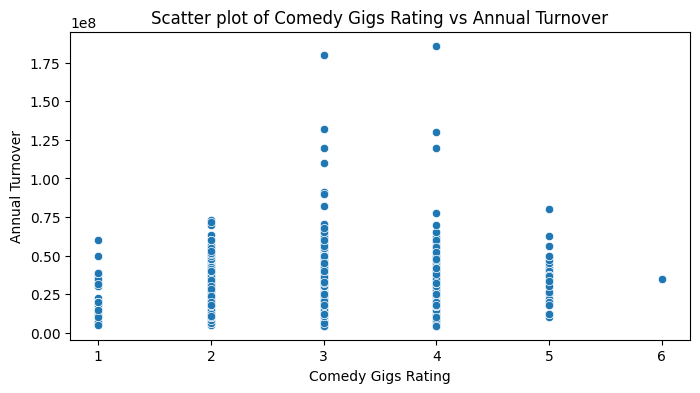

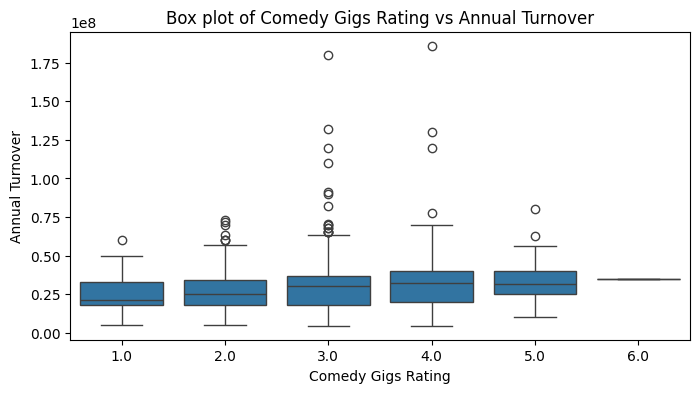

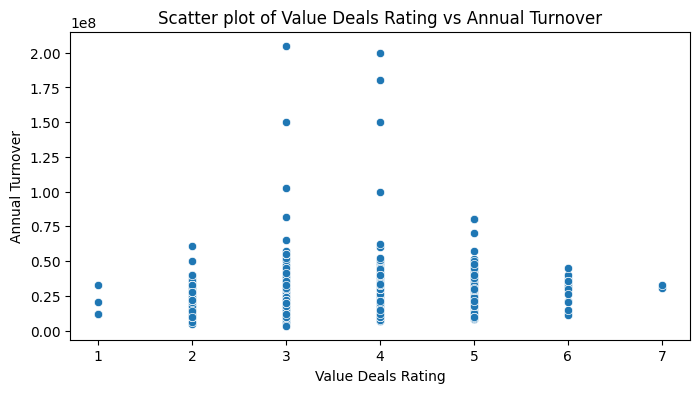

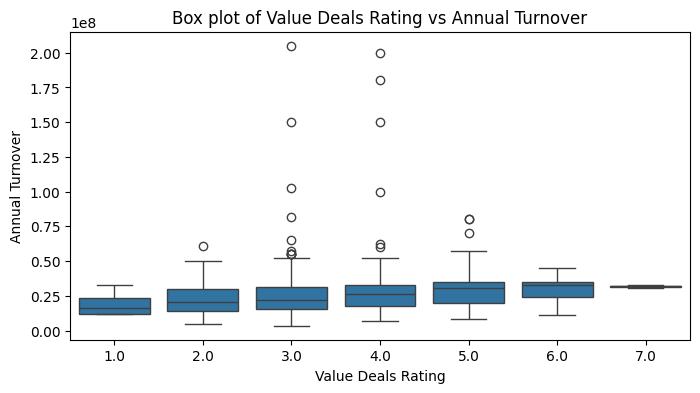

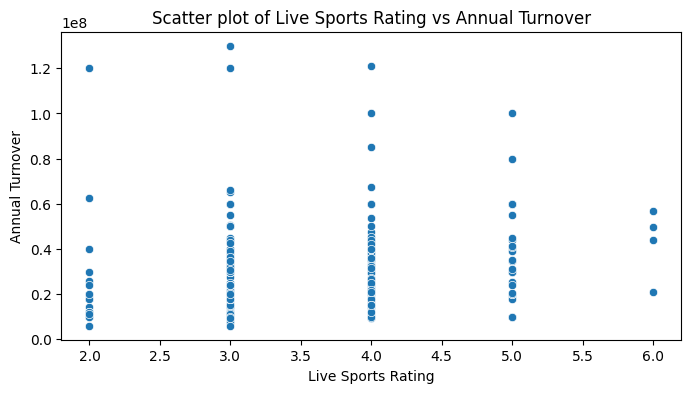

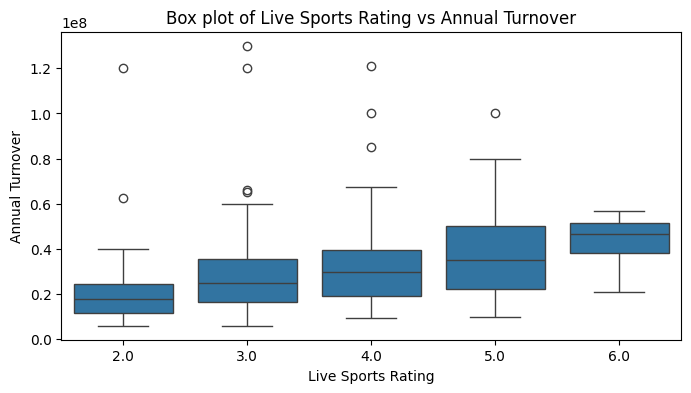

In [ ]:
# List of columns with many missing values
cols_with_many_missing = ['Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating']

# Plotting the relationship between these features and Annual Turnover
for col in cols_with_many_missing:
    # Drop rows where the target or feature is missing
    temp_df = train.dropna(subset=[col, 'Annual Turnover'])

    # Scatter plot
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=temp_df, x=col, y='Annual Turnover')
    plt.title(f'Scatter plot of {col} vs Annual Turnover')
    plt.show()

    # Box plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=temp_df, x=col, y='Annual Turnover')
    plt.title(f'Box plot of {col} vs Annual Turnover')
    plt.show()

In [ ]:
# Calculate the correlation coefficient for these features with Annual Turnover
for col in cols_with_many_missing:
    if col in train.columns:  # Check if the column hasn't been dropped already
        correlation = train[col].corr(train['Annual Turnover'])
        print(f'Correlation of {col} with Annual Turnover: {correlation}')

Correlation of Comedy Gigs Rating with Annual Turnover: 0.12935367887401636
Correlation of Value Deals Rating with Annual Turnover: 0.11686807168633945
Correlation of Live Sports Rating with Annual Turnover: 0.17829505322185474


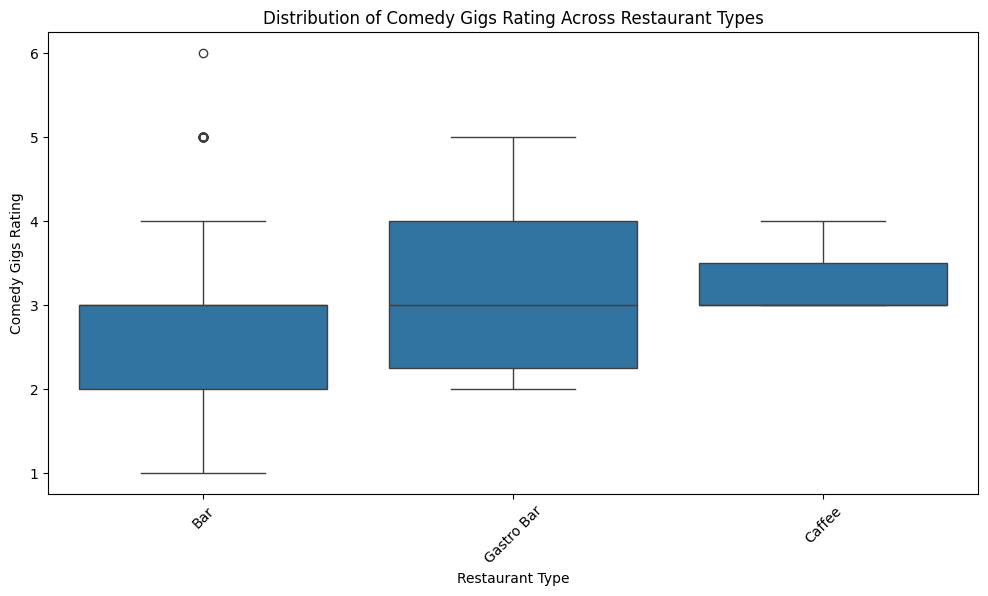

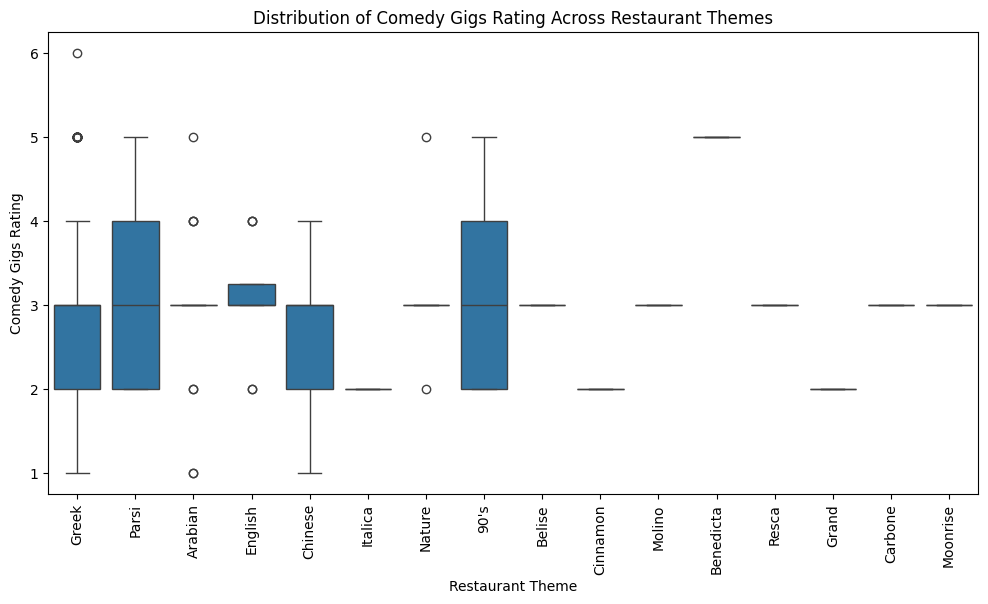

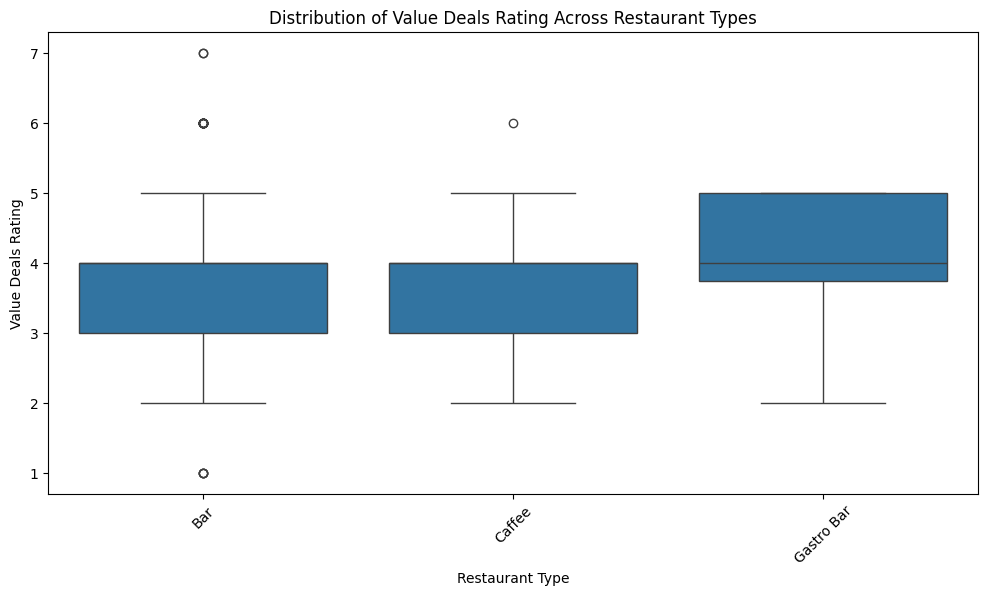

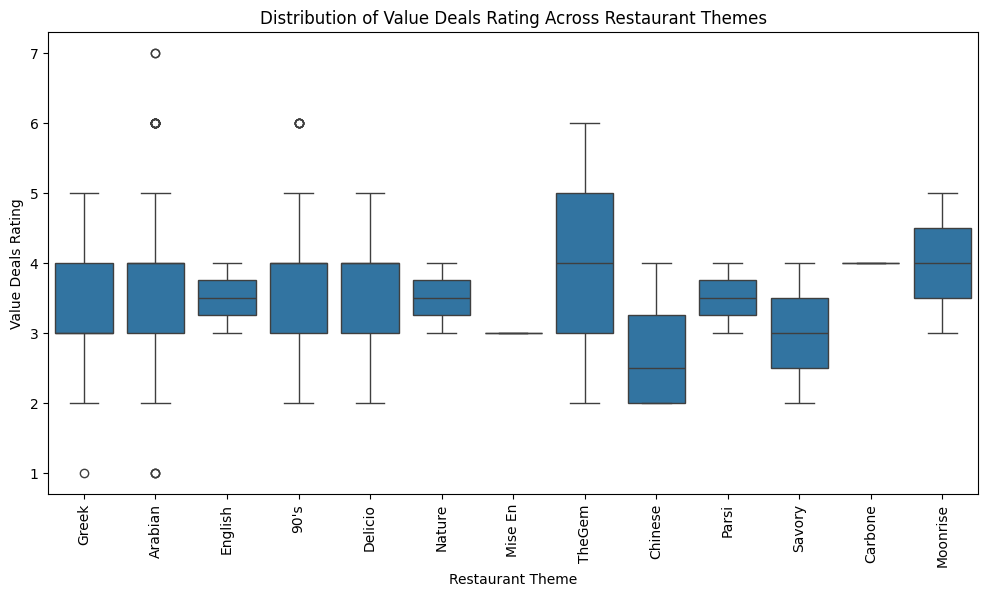

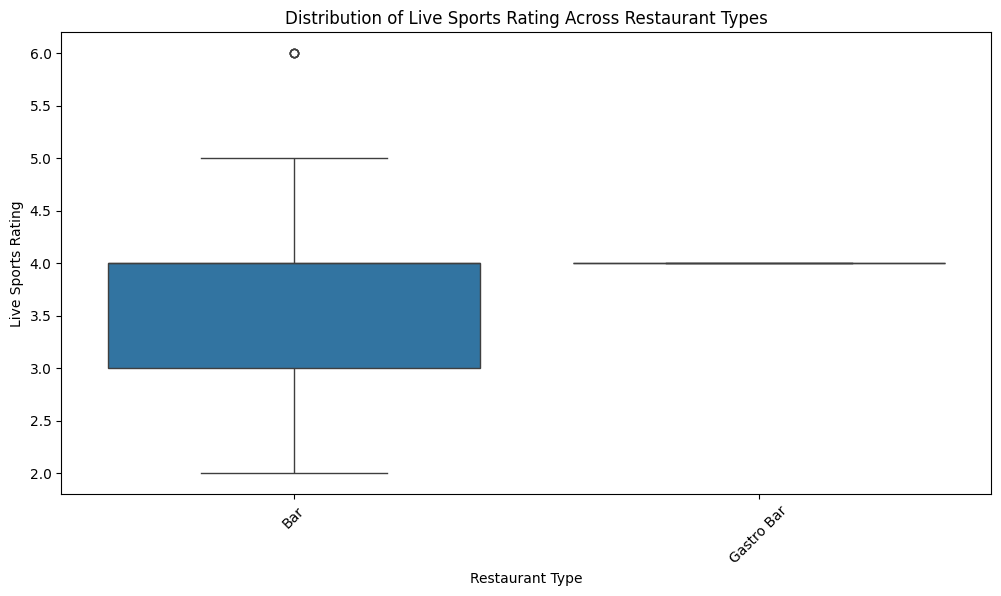

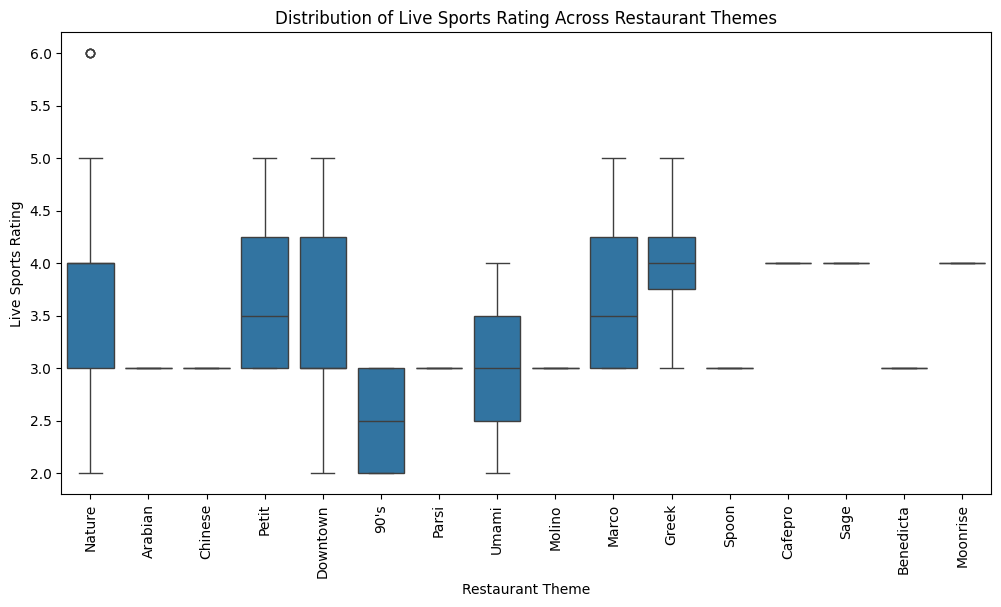

In [ ]:
# Visualize the distribution of non-null ratings across different restaurant types
for col in ['Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating']:
    # Filter out missing values for the column and any related categorical variables
    temp_df = train.dropna(subset=[col, 'Restaurant Type', 'Restaurant Theme'])

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=temp_df, x='Restaurant Type', y=col)
    plt.title(f'Distribution of {col} Across Restaurant Types')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=temp_df, x='Restaurant Theme', y=col)
    plt.title(f'Distribution of {col} Across Restaurant Themes')
    plt.xticks(rotation=90)  # Rotate the labels for better readability
    plt.show()

In [ ]:
# Calculate the proportion of missing values for ratings across restaurant types
for col in ['Comedy Gigs Rating', 'Value Deals Rating', 'Live Sports Rating']:
    print(f"\nProportion of missing values for {col} across Restaurant Types:")
    prop_missing_by_type = train['Restaurant Type'].value_counts(normalize=True) - train.dropna(subset=[col])['Restaurant Type'].value_counts(normalize=True)
    print(prop_missing_by_type)

    print(f"\nProportion of missing values for {col} across Restaurant Themes:")
    prop_missing_by_theme = train['Restaurant Theme'].value_counts(normalize=True) - train.dropna(subset=[col])['Restaurant Theme'].value_counts(normalize=True)
    print(prop_missing_by_theme)



Proportion of missing values for Comedy Gigs Rating across Restaurant Types:
Restaurant Type
Bar                        -0.057030
Buffet/Family Restaurant         NaN
Caffee                      0.057723
Gastro Bar                 -0.000978
Name: proportion, dtype: float64

Proportion of missing values for Comedy Gigs Rating across Restaurant Themes:
Restaurant Theme
90's         0.155310
Ambiance          NaN
Arabian      0.376240
Bakery            NaN
Belise       0.003018
Benedicta   -0.000131
Bettaso           NaN
Cafepro           NaN
Carbone      0.000155
Chinese     -0.016439
Cinnamon    -0.000704
Delicio           NaN
Downtown          NaN
English     -0.006442
Flavors           NaN
Grand       -0.000704
Greek       -0.527897
Italica     -0.000704
LaCuisine         NaN
Marco             NaN
Mise En           NaN
Molino       0.004318
Moonrise     0.001873
Nature       0.046295
Parsi       -0.054671
Petit             NaN
Picante           NaN
Piquant           NaN
Resca       -

In [ ]:
# Creating a new binary feature in both train and test datasets
# Indicates whether the restaurant is a bar and has a Live Sports Rating
train['IsBarWithLiveSports'] = ((train['Restaurant Type'] == 'Bar') & train['Live Sports Rating'].notna()).astype(int)
test['IsBarWithLiveSports'] = ((test['Restaurant Type'] == 'Bar') & test['Live Sports Rating'].notna()).astype(int)

# Now, we can drop the 'Live Sports Rating' column as we have captured its essence in the new feature
train.drop(columns='Live Sports Rating', inplace=True)
test.drop(columns='Live Sports Rating', inplace=True)


In [ ]:
# Dropping columns with too many missing values
cols_to_drop = ['Comedy Gigs Rating', 'Value Deals Rating']
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3394 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3437 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [ ]:
# Imputer for numerical columns with median strategy
num_imputer_median = SimpleImputer(strategy='median')

# Columns with missing values to impute
cols_to_impute_median = [
    'Facebook Popularity Quotient',
    'Instagram Popularity Quotient',
    'Overall Restaurant Rating',
    'Live Music Rating',
    'Ambience'
]

# Fit on the training data and transform both train and test datasets
num_imputer_median.fit(train[cols_to_impute_median])

train[cols_to_impute_median] = num_imputer_median.transform(train[cols_to_impute_median])
test[cols_to_impute_median] = num_imputer_median.transform(test[cols_to_impute_median])

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Registration Number            3493 non-null   int64  
 1   Annual Turnover                3493 non-null   int64  
 2   Cuisine                        3493 non-null   object 
 3   City                           3493 non-null   object 
 4   Restaurant Location            3493 non-null   object 
 5   Opening Day of Restaurant      3493 non-null   object 
 6   Facebook Popularity Quotient   3493 non-null   float64
 7   Endorsed By                    3493 non-null   object 
 8   Instagram Popularity Quotient  3493 non-null   float64
 9   Fire Audit                     3493 non-null   int64  
 10  Liquor License Obtained        3493 non-null   int64  
 11  Situated in a Multi Complex    3493 non-null   int64  
 12  Dedicated Parking              3493 non-null   i

In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder

# Initialize the encoder
target_encoder = TargetEncoder()

# Select the feature and target for encoding
feature = 'City'
target = 'Annual Turnover'

# Fit the encoder on the training set and transform both train and test sets
train[f'{feature}_encoded'] = target_encoder.fit_transform(train[feature], train[target])
test[f'{feature}_encoded'] = target_encoder.transform(test[feature])

# Drop the original 'City' column as it's now encoded
train.drop(columns=[feature], inplace=True)
test.drop(columns=[feature], inplace=True)

In [ ]:
# Encoding 'Restaurant Location', 'Endorsed By', 'Restaurant Type', and 'Restaurant Theme' using one-hot encoding
one_hot_features = ['Restaurant Location', 'Endorsed By', 'Restaurant Type', 'Restaurant Theme']

# Apply pd.get_dummies to the training and test set, ensuring that all categories are included in both
for feature in one_hot_features:
    train = pd.get_dummies(train, columns=[feature], prefix=feature, drop_first=True)
    test = pd.get_dummies(test, columns=[feature], prefix=feature, drop_first=True)

# Align train and test sets to ensure they have the same dummy variables
train, test = train.align(test, join='left', axis=1, fill_value=0)


KeyError: "None of [Index(['Endorsed By'], dtype='object')] are in the [columns]"

In [ ]:
print("Train columns:", train.columns)
print("Test columns:", test.columns)

Train columns: Index(['Registration Number', 'Annual Turnover', 'Cuisine',
       'Opening Day of Restaurant', 'Facebook Popularity Quotient',
       'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Type', 'Restaurant Theme', 'Restaurant Zomato Rating',
       'Restaurant City Tier', 'Order Wait Time', 'Staff Responsivness',
       'Value for Money', 'Hygiene Rating', 'Food Rating',
       'Overall Restaurant Rating', 'Live Music Rating', 'Ambience', 'Lively',
       'Service', 'Comfortablility', 'Privacy', 'IsBarWithLiveSports',
       'City_encoded', 'Restaurant Location_Near Party Hub',
       'Endorsed By_Not Specific', 'Endorsed By_Tier A Celebrity'],
      dtype='object')
Test columns: Index(['Registration Number', 'Cuisine', 'Opening Day of Restaurant',
       'Facebook Popularity Quotient', 'Endoresed By',
       'Instagram Po

In [ ]:
# Rename the 'Endoresed By' column in the test dataset to match the train dataset
test.rename(columns={'Endoresed By': 'Endorsed By'}, inplace=True)


In [ ]:
# Features to be one-hot encoded
features_to_encode = ['Restaurant Type', 'Restaurant Theme']

# Create dummy variables for the train and test datasets
for feature in features_to_encode:
    train = pd.get_dummies(train, columns=[feature], prefix=feature, drop_first=True)
    test = pd.get_dummies(test, columns=[feature], prefix=feature, drop_first=True)

# Align train and test sets to ensure they have the same dummy variables
train, test = train.align(test, join='left', axis=1, fill_value=0)


In [ ]:
print("Final Train columns:", train.columns)
print("Final Test columns:", test.columns)


Final Train columns: Index(['Registration Number', 'Annual Turnover', 'Cuisine',
       'Opening Day of Restaurant', 'Facebook Popularity Quotient',
       'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time',
       'Staff Responsivness', 'Value for Money', 'Hygiene Rating',
       'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating',
       'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy',
       'IsBarWithLiveSports', 'City_encoded',
       'Restaurant Location_Near Party Hub', 'Endorsed By_Not Specific',
       'Endorsed By_Tier A Celebrity',
       'Restaurant Type_Buffet/Family Restaurant', 'Restaurant Type_Caffee',
       'Restaurant Type_Gastro Bar', 'Restaurant Theme_Ambiance',
       'Restaurant Theme_Arabian', 'Restaurant Theme_Bakery',
       'Re

In [ ]:
print("Train columns:", train.columns)
print("Test columns:", test.columns)


Train columns: Index(['Registration Number', 'Annual Turnover', 'Cuisine',
       'Opening Day of Restaurant', 'Facebook Popularity Quotient',
       'Instagram Popularity Quotient', 'Fire Audit',
       'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time',
       'Staff Responsivness', 'Value for Money', 'Hygiene Rating',
       'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating',
       'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy',
       'IsBarWithLiveSports', 'City_encoded',
       'Restaurant Location_Near Party Hub', 'Endorsed By_Not Specific',
       'Endorsed By_Tier A Celebrity',
       'Restaurant Type_Buffet/Family Restaurant', 'Restaurant Type_Caffee',
       'Restaurant Type_Gastro Bar', 'Restaurant Theme_Ambiance',
       'Restaurant Theme_Arabian', 'Restaurant Theme_Bakery',
       'Restaura

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

In [ ]:
# Ensuring that all entries in the 'Cuisine' column are lists
train['Cuisine'] = train['Cuisine'].apply(lambda x: x if isinstance(x, list) else (x.split(',') if isinstance(x, str) else []))
test['Cuisine'] = test['Cuisine'].apply(lambda x: x if isinstance(x, list) else (x.split(',') if isinstance(x, str) else []))

# Handling missing values - replacing NaN with an empty list
train['Cuisine'] = train['Cuisine'].apply(lambda x: x if isinstance(x, list) else [])
test['Cuisine'] = test['Cuisine'].apply(lambda x: x if isinstance(x, list) else [])



In [ ]:
# Now applying MultiLabelBinarizer
mlb = MultiLabelBinarizer()
train_cuisine = pd.DataFrame(mlb.fit_transform(train['Cuisine']), columns=mlb.classes_, index=train.index)
test_cuisine = pd.DataFrame(mlb.transform(test['Cuisine']), columns=mlb.classes_, index=test.index)

# Concatenate the new binary columns with the original DataFrame
train = pd.concat([train, train_cuisine], axis=1)
test = pd.concat([test, test_cuisine], axis=1)

In [ ]:
# Dropping the original 'Cuisine' column
train.drop('Cuisine', axis=1, inplace=True)
test.drop('Cuisine', axis=1, inplace=True)

In [ ]:
#Impute missing values with the median (or another statistic)
median_value = train['Resturant Tier'].median()
train['Resturant Tier'].fillna(median_value, inplace=True)
test['Resturant Tier'].fillna(median_value, inplace=True)  # Assuming test needs this too

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 91 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Registration Number                       3493 non-null   int64  
 1   Annual Turnover                           3493 non-null   int64  
 2   Opening Day of Restaurant                 3493 non-null   object 
 3   Facebook Popularity Quotient              3493 non-null   float64
 4   Instagram Popularity Quotient             3493 non-null   float64
 5   Fire Audit                                3493 non-null   int64  
 6   Liquor License Obtained                   3493 non-null   int64  
 7   Situated in a Multi Complex               3493 non-null   int64  
 8   Dedicated Parking                         3493 non-null   int64  
 9   Open Sitting Available                    3493 non-null   int64  
 10  Resturant Tier                      

In [ ]:
# Transform 'Opening Day of Restaurant' into a numerical feature
train['Days Since Opening'] = (pd.to_datetime('today') - pd.to_datetime(train['Opening Day of Restaurant'])).dt.days
test['Days Since Opening'] = (pd.to_datetime('today') - pd.to_datetime(test['Opening Day of Restaurant'])).dt.days

train.drop('Opening Day of Restaurant', axis=1, inplace=True)
test.drop('Opening Day of Restaurant', axis=1, inplace=True)

In [ ]:
train.describe().round(2).T




,count,mean,std,min,25%,50%,75%,max
Registration Number,3493.0,61747.00,1008.49,60001.00,60874.00,61747.00,62620.0,6.349300e+04
Annual Turnover,3493.0,30725708.56,21651246.90,3500000.00,18000000.00,30000000.00,37000000.0,4.000000e+08
Facebook Popularity Quotient,3493.0,77.97,9.69,43.00,72.00,79.00,85.6,9.776000e+01
Instagram Popularity Quotient,3493.0,74.40,10.85,40.00,66.40,74.05,82.2,9.870000e+01
Fire Audit,3493.0,0.79,0.41,0.00,1.00,1.00,1.0,1.000000e+00
Liquor License Obtained,3493.0,0.99,0.11,0.00,1.00,1.00,1.0,1.000000e+00
Situated in a Multi Complex,3493.0,0.81,0.39,0.00,1.00,1.00,1.0,1.000000e+00
Dedicated Parking,3493.0,0.80,0.40,0.00,1.00,1.00,1.0,1.000000e+00
Open Sitting Available,3493.0,0.80,0.40,0.00,1.00,1.00,1.0,1.000000e+00
Resturant Tier,3493.0,1.93,0.26,1.00,2.00,2.00,2.0,2.000000e+00


from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['25%'].plot(kind='hist', bins=20, title='25%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='25%', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['count']
  ys = series['25%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('count', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('count')
_ = plt.ylabel('25%')

from matplotlib import pyplot as plt
_df_12['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['25%'].plot(kind='line', figsize=(8, 4), title='25%')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# Checking for missing values in the dataset
print(train.isnull().sum())


Registration Number              0
Annual Turnover                  0
Facebook Popularity Quotient     0
Instagram Popularity Quotient    0
Fire Audit                       0
                                ..
thai                             0
tibetan                          0
turkish                          0
welsh                            0
Days Since Opening               0
Length: 91, dtype: int64


In [ ]:
# Checking duplicates in the training dataset
duplicate_rows_train = train.duplicated()
print("Number of duplicate rows in train dataset:", duplicate_rows_train.sum())

# Checking duplicates in the testing dataset
duplicate_rows_test = test.duplicated()
print("Number of duplicate rows in test dataset:", duplicate_rows_test.sum())


Number of duplicate rows in train dataset: 0
Number of duplicate rows in test dataset: 0


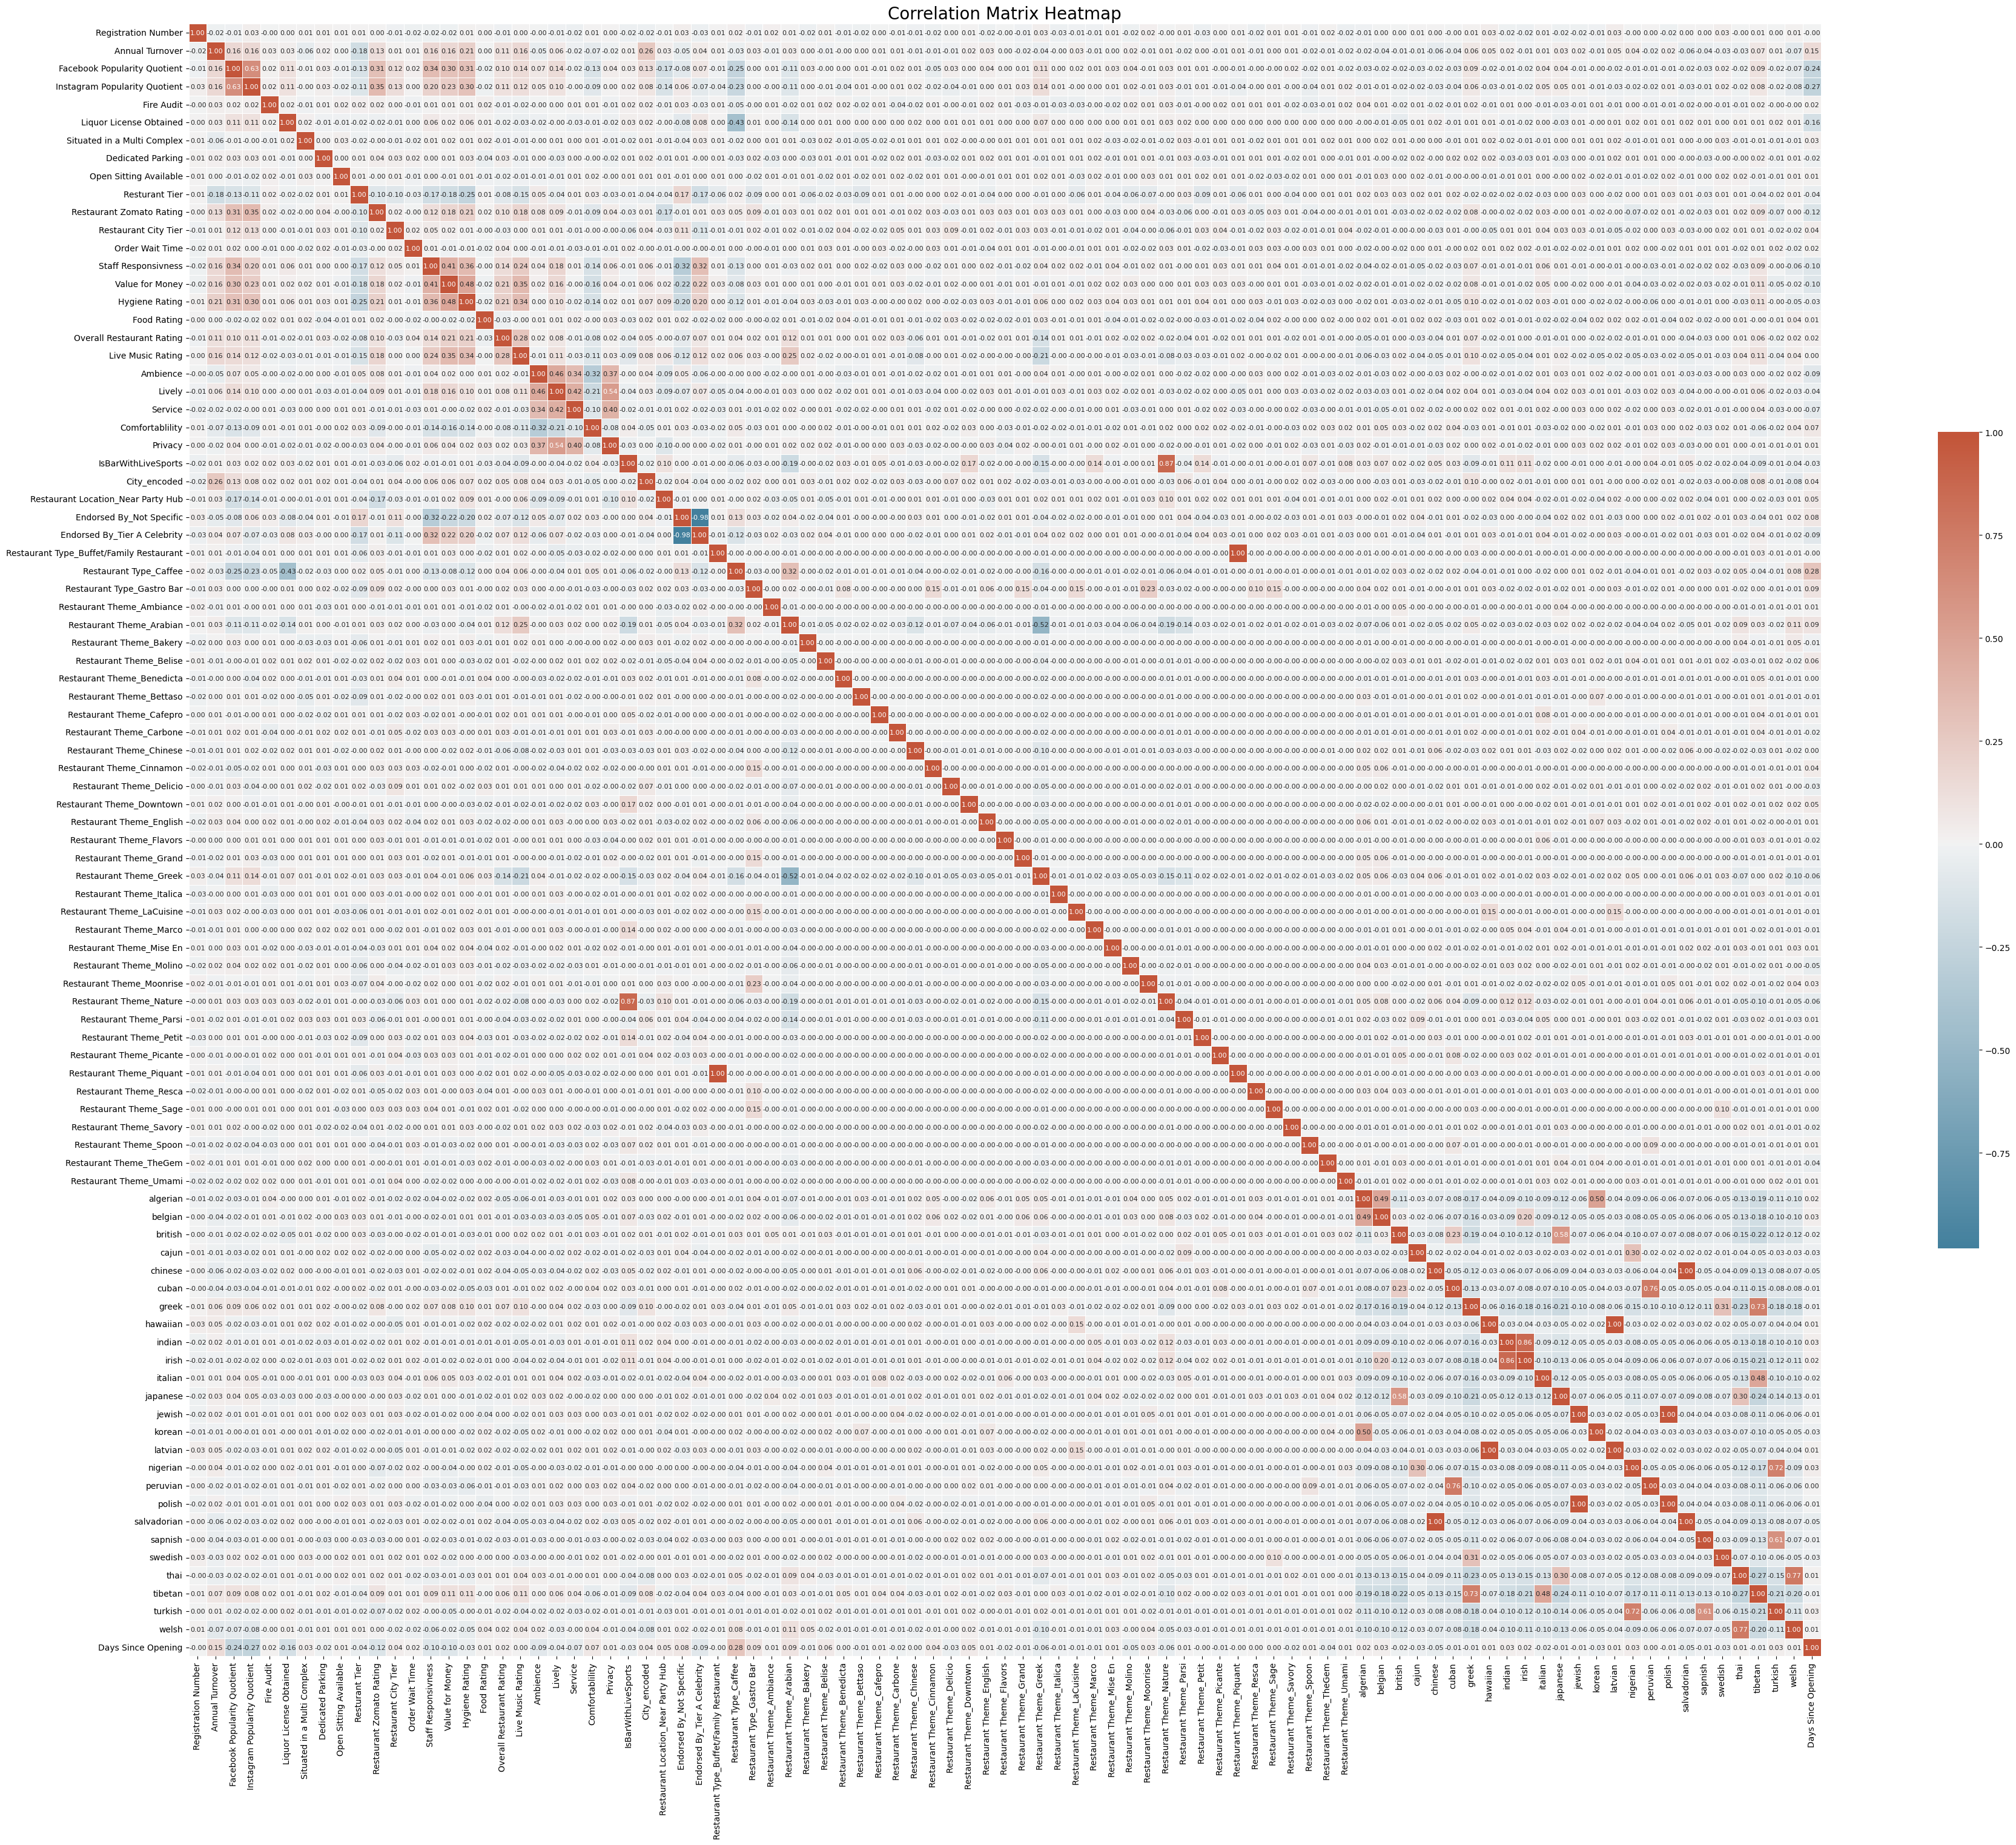

In [ ]:

# Compute the correlation matrix
correlation_matrix = train.corr()

# Set up the matplotlib figure
plt.figure(figsize=(50, 35))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot=True, fmt=".2f", annot_kws={'size': 8})

# Improve the visibility of the heatmap
plt.xticks(rotation=90, fontsize=10)  # Rotate the x labels and set their font size
plt.yticks(rotation=0, fontsize=10)  # Set the y labels' font size
plt.title('Correlation Matrix Heatmap', fontsize=20)

# Show the plot
plt.show()


In [ ]:
# Calculate the correlation matrix
corr_matrix = train.corr()

# Create a DataFrame from the correlation matrix
corr_df = corr_matrix.stack().reset_index()
corr_df.columns = ['Feature1', 'Feature2', 'Correlation']

# Filter out self-correlations by removing pairs where features are the same
corr_df = corr_df[corr_df['Feature1'] != corr_df['Feature2']]

# Sort by absolute value of correlation to see the strongest correlations at the top
corr_df['AbsCorrelation'] = corr_df['Correlation'].abs()
corr_df_sorted = corr_df.sort_values(by='AbsCorrelation', ascending=False)

# Optionally, filter to show only correlations above a certain threshold
threshold = 0.8  # For example, only show correlations stronger than 0.8
high_corr_df = corr_df_sorted[corr_df_sorted['AbsCorrelation'] > threshold]

high_corr_df


,Feature1,Feature2,Correlation,AbsCorrelation
7539,polish,jewish,1.000000,1.000000
7622,salvadorian,chinese,1.000000,1.000000
6631,hawaiian,latvian,1.000000,1.000000
6362,chinese,salvadorian,1.000000,1.000000
2697,Restaurant Type_Buffet/Family Restaurant,Restaurant Theme_Piquant,1.000000,1.000000
7261,latvian,hawaiian,1.000000,1.000000
5307,Restaurant Theme_Piquant,Restaurant Type_Buffet/Family Restaurant,1.000000,1.000000
7089,jewish,polish,1.000000,1.000000
2575,Endorsed By_Tier A Celebrity,Endorsed By_Not Specific,-0.981525,0.981525
2485,Endorsed By_Not Specific,Endorsed By_Tier A Celebrity,-0.981525,0.981525


In [ ]:
# Example to inspect values for a pair of perfectly correlated features
def inspect_features(df, feature1, feature2):
    print(f"Unique values in {feature1}: {df[feature1].unique()}")
    print(f"Unique values in {feature2}: {df[feature2].unique()}")
    print(f"\nCross tabulation between {feature1} and {feature2}:")
    return pd.crosstab(df[feature1], df[feature2])

# Inspecting each pair of perfectly correlated features
# Replace 'feature1' and 'feature2' with actual feature names
inspect_features(train, 'polish', 'jewish')
inspect_features(train, 'salvadorian', 'chinese')
inspect_features(train, 'hawaiian', 'latvian')
inspect_features(train, 'Restaurant Type_Buffet/Family Restaurant', 'Restaurant Theme_Piquant')


Unique values in polish: [0 1]
Unique values in jewish: [0 1]

Cross tabulation between polish and jewish:
Unique values in salvadorian: [0 1]
Unique values in chinese: [0 1]

Cross tabulation between salvadorian and chinese:
Unique values in hawaiian: [0 1]
Unique values in latvian: [0 1]

Cross tabulation between hawaiian and latvian:
Unique values in Restaurant Type_Buffet/Family Restaurant: [False  True]
Unique values in Restaurant Theme_Piquant: [False  True]

Cross tabulation between Restaurant Type_Buffet/Family Restaurant and Restaurant Theme_Piquant:


Restaurant Theme_Piquant,False,True
Restaurant Type_Buffet/Family Restaurant,,
False,3492,0
True,0,1


In [ ]:
# List of features to drop based on the perfect correlation analysis
features_to_drop = ['jewish', 'chinese', 'latvian', 'Restaurant Theme_Piquant']

# Dropping the features from the dataset
train.drop(columns=features_to_drop, inplace=True)

test.drop(columns=features_to_drop, inplace=True)

# Verifying the features are dropped
print(train.columns)


Index(['Registration Number', 'Annual Turnover',
       'Facebook Popularity Quotient', 'Instagram Popularity Quotient',
       'Fire Audit', 'Liquor License Obtained', 'Situated in a Multi Complex',
       'Dedicated Parking', 'Open Sitting Available', 'Resturant Tier',
       'Restaurant Zomato Rating', 'Restaurant City Tier', 'Order Wait Time',
       'Staff Responsivness', 'Value for Money', 'Hygiene Rating',
       'Food Rating', 'Overall Restaurant Rating', 'Live Music Rating',
       'Ambience', 'Lively', 'Service', 'Comfortablility', 'Privacy',
       'IsBarWithLiveSports', 'City_encoded',
       'Restaurant Location_Near Party Hub', 'Endorsed By_Not Specific',
       'Endorsed By_Tier A Celebrity',
       'Restaurant Type_Buffet/Family Restaurant', 'Restaurant Type_Caffee',
       'Restaurant Type_Gastro Bar', 'Restaurant Theme_Ambiance',
       'Restaurant Theme_Arabian', 'Restaurant Theme_Bakery',
       'Restaurant Theme_Belise', 'Restaurant Theme_Benedicta',
       'Restau

In [ ]:
print(train.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 87 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Registration Number                       3493 non-null   int64  
 1   Annual Turnover                           3493 non-null   int64  
 2   Facebook Popularity Quotient              3493 non-null   float64
 3   Instagram Popularity Quotient             3493 non-null   float64
 4   Fire Audit                                3493 non-null   int64  
 5   Liquor License Obtained                   3493 non-null   int64  
 6   Situated in a Multi Complex               3493 non-null   int64  
 7   Dedicated Parking                         3493 non-null   int64  
 8   Open Sitting Available                    3493 non-null   int64  
 9   Resturant Tier                            3493 non-null   float64
 10  Restaurant Zomato Rating            

In [ ]:
# Check if train and test datasets have the same features
print(set(train.columns) - set(test.columns))
print(set(test.columns) - set(train.columns))


set()
set()


In [ ]:
from sklearn.model_selection import train_test_split


X = train.drop(['Annual Turnover'], axis=1)  # Features
y = train['Annual Turnover']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Checking for NaN values in the dataset
print(X_train.isnull().sum())


Registration Number              0
Facebook Popularity Quotient     0
Instagram Popularity Quotient    0
Fire Audit                       0
Liquor License Obtained          0
                                ..
thai                             0
tibetan                          0
turkish                          0
welsh                            0
Days Since Opening               0
Length: 86, dtype: int64


In [ ]:
# Display data types
print(X_train.dtypes)


Registration Number                int64
Facebook Popularity Quotient     float64
Instagram Popularity Quotient    float64
Fire Audit                         int64
Liquor License Obtained            int64
                                  ...   
thai                               int64
tibetan                            int64
turkish                            int64
welsh                              int64
Days Since Opening                 int64
Length: 86, dtype: object


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_val)

# Calculate the performance metrics
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 373408162237595.44
Root Mean Squared Error (RMSE): 19323771.946428973
R^2 Score: 0.1403602133953601


Very poor model by every measure. Will utilize grid search to try and improve the model with hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [350, 400, 450],
    'max_depth': [None, 35, 45, 55],
    'min_samples_split': [18, 20, 22],
    'min_samples_leaf': [5, 6, 7],
    'max_features': ['auto'],
    'bootstrap': [True]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score (negative MSE):", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 22, 'n_estimators': 350}
Best score (negative MSE): -389620615466689.25


In [ ]:
mse = -grid_search.best_score_
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 19738809.87969359


Results of first grid search model. Fitting 3 folds for each of 360 candidates, totalling 1080 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 20, 'n_estimators': 400}
Best score (negative MSE): -386883147797813.8

Results of second grid search model.Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 18, 'n_estimators': 400}
Best score (negative MSE): -385783540109776.75

Root Mean Squared Error (RMSE): 19641373.17271317

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define XGBoost regressor with a sample set of starting parameters
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,  # Common starting value
    learning_rate=0.1,  # Common starting value
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Split data for training and validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train, eval_metric="rmse", eval_set=[(X_val, y_val)], verbose=True, early_stopping_rounds=10)

# Predict and calculate RMSE
y_pred = xgb_model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Initial XGBoost RMSE: {rmse}")


[0]	validation_0-rmse:21063881.89989
[1]	validation_0-rmse:20868128.10806
[2]	validation_0-rmse:20757229.61416
[3]	validation_0-rmse:20570349.30990
[4]	validation_0-rmse:20315407.68304
[5]	validation_0-rmse:20182660.37123
[6]	validation_0-rmse:20024783.09604
[7]	validation_0-rmse:19932575.77943
[8]	validation_0-rmse:19892006.24081
[9]	validation_0-rmse:19808824.11598
[10]	validation_0-rmse:19765872.33156
[11]	validation_0-rmse:19702496.98732
[12]	validation_0-rmse:19684170.86165
[13]	validation_0-rmse:19705033.11114
[14]	validation_0-rmse:19617773.83775
[15]	validation_0-rmse:19559306.00454
[16]	validation_0-rmse:19607622.45564
[17]	validation_0-rmse:19658527.44245
[18]	validation_0-rmse:19619281.98028
[19]	validation_0-rmse:19573166.01986
[20]	validation_0-rmse:19566341.38087
[21]	validation_0-rmse:19561657.64464
[22]	validation_0-rmse:19536770.64002
[23]	validation_0-rmse:19442741.75452
[24]	validation_0-rmse:19483824.46126
[25]	validation_0-rmse:19492195.91583
[26]	validation_0-rmse

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,  # Increased number of trees
    max_depth=5,       # Increased depth for more complex patterns
    learning_rate=0.01,  # Lower learning rate for finer adjustments
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,            # Default value
    min_child_weight=1, # Default value
    random_state=42

)

xgb_model.fit(
    X_train, y_train,
    eval_metric="rmse",
    eval_set=[(X_val, y_val)],
    verbose=True,
    early_stopping_rounds=100  # More room to find improvement
)
# Predict and calculate RMSE
y_pred = xgb_model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Second XGBoost RMSE: {rmse}")

[0]	validation_0-rmse:21302849.38767
[1]	validation_0-rmse:21284052.81384
[2]	validation_0-rmse:21267387.53404
[3]	validation_0-rmse:21243633.62640
[4]	validation_0-rmse:21205593.22354
[5]	validation_0-rmse:21175226.08310
[6]	validation_0-rmse:21148541.20468
[7]	validation_0-rmse:21128372.65422
[8]	validation_0-rmse:21104738.21154
[9]	validation_0-rmse:21086949.56113
[10]	validation_0-rmse:21066263.88585
[11]	validation_0-rmse:21043937.83690
[12]	validation_0-rmse:21022497.04986
[13]	validation_0-rmse:20998736.20515
[14]	validation_0-rmse:20979926.01430
[15]	validation_0-rmse:20954363.75257
[16]	validation_0-rmse:20934358.09581
[17]	validation_0-rmse:20916525.61084
[18]	validation_0-rmse:20891640.98480
[19]	validation_0-rmse:20873446.23213
[20]	validation_0-rmse:20853491.09498
[21]	validation_0-rmse:20834272.15602
[22]	validation_0-rmse:20812822.57706
[23]	validation_0-rmse:20801019.13787
[24]	validation_0-rmse:20782611.31665
[25]	validation_0-rmse:20764855.23833
[26]	validation_0-rmse

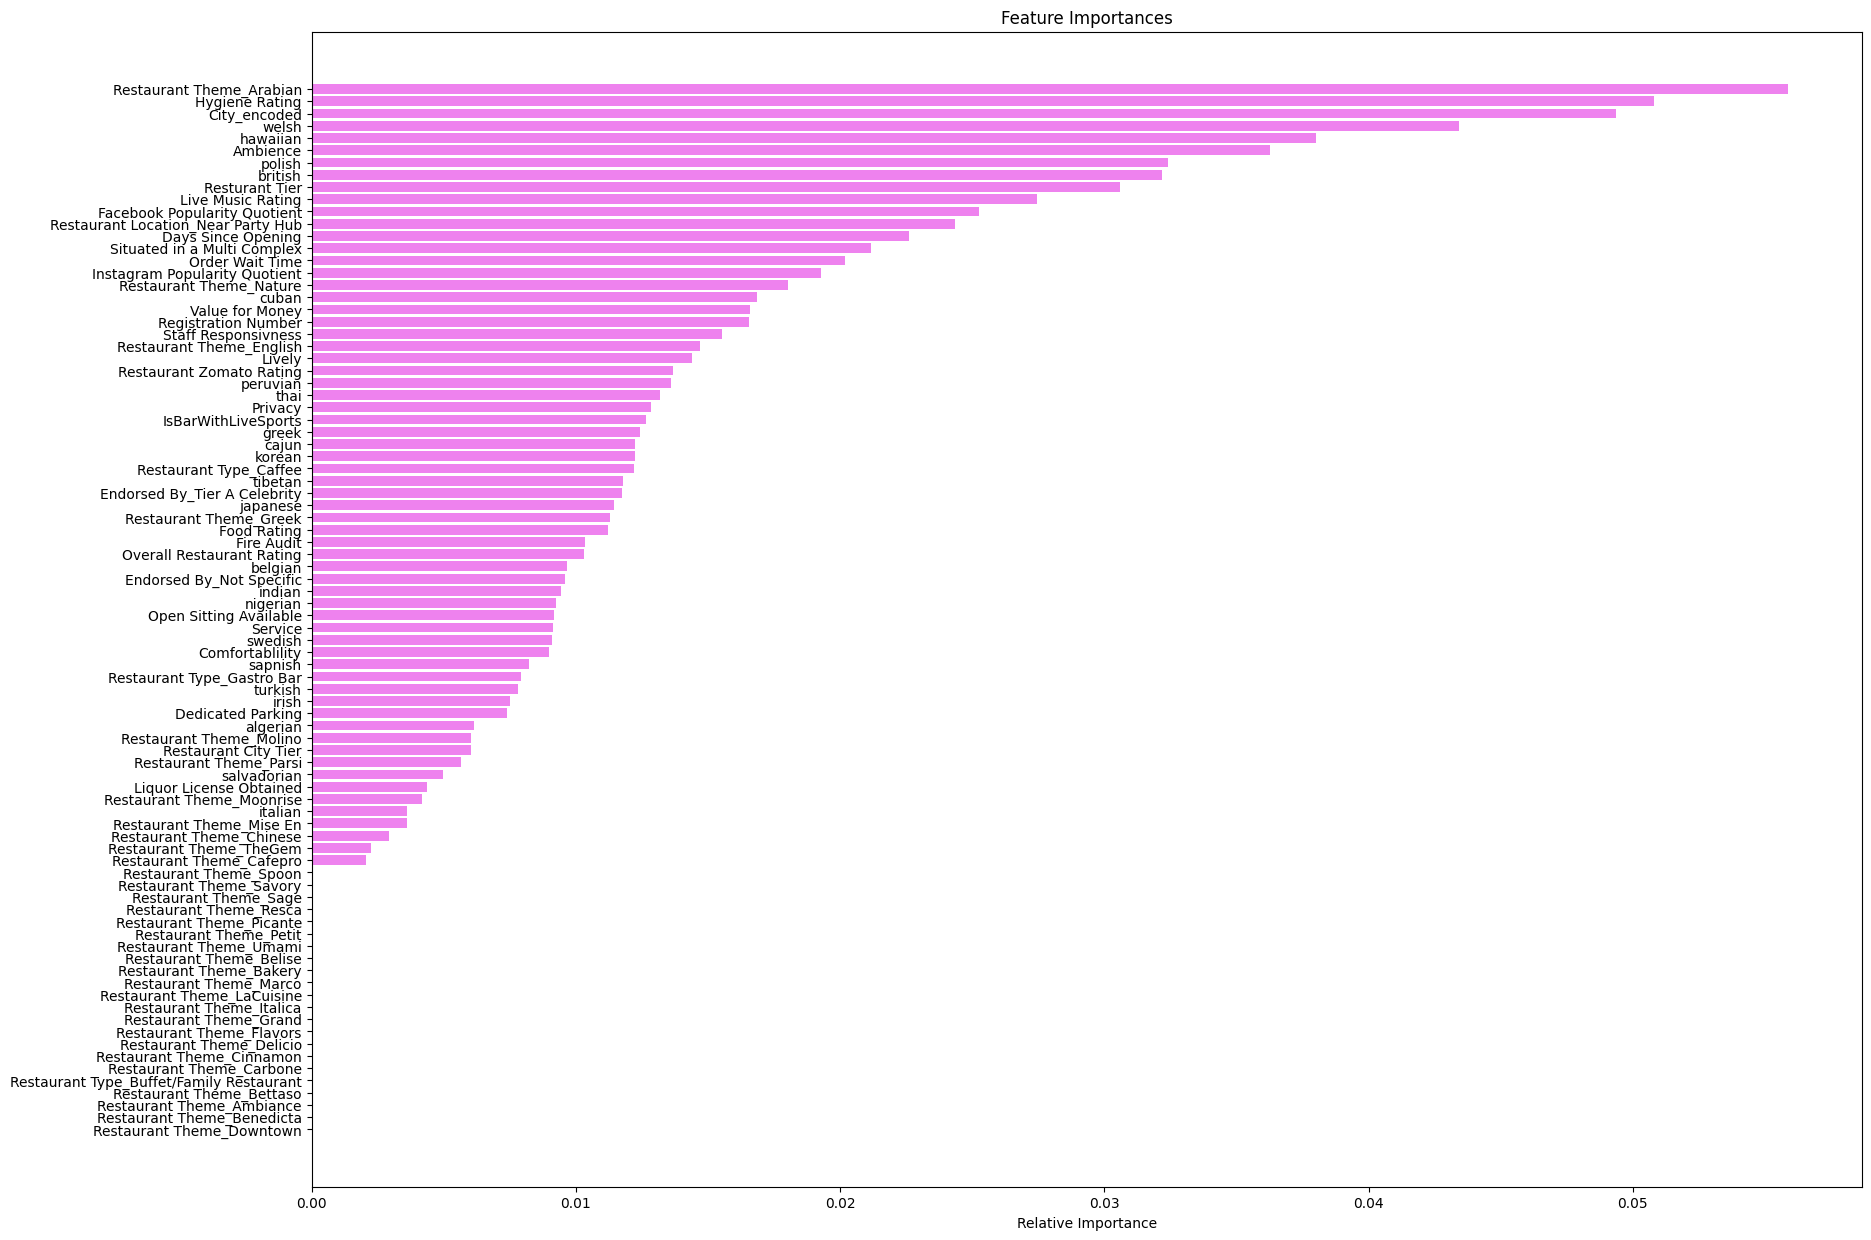

In [ ]:
feature_names = X_train.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

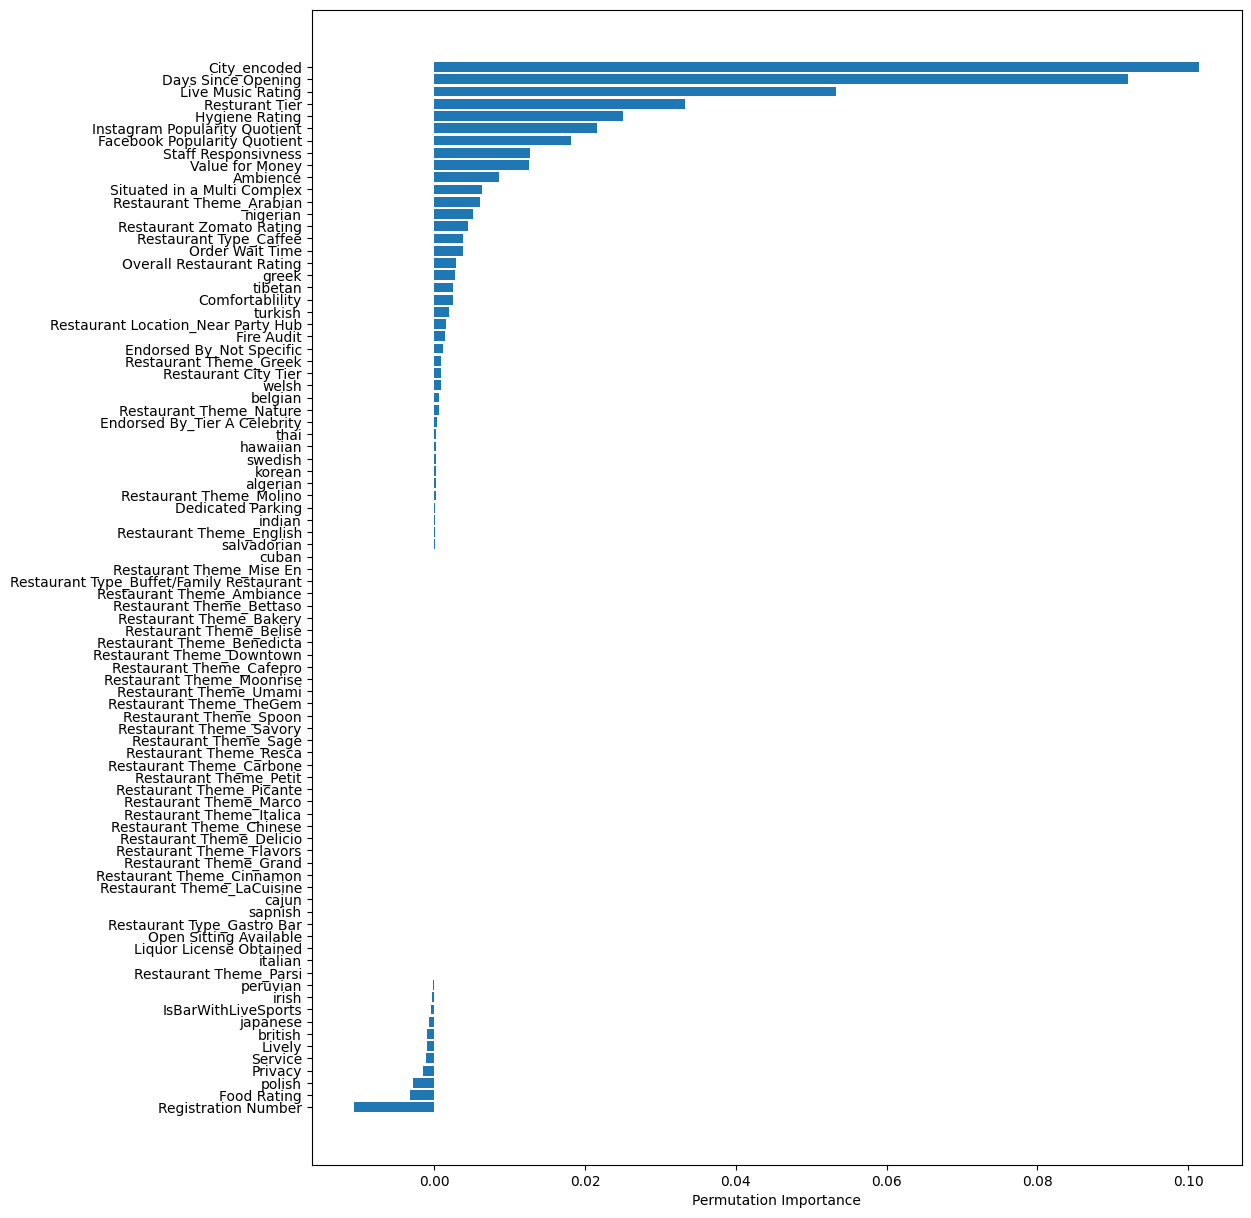

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(xgb_model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()

# Increase the figure size for better readability
plt.figure(figsize=(12, 15))

# Visualize permutation importance
plt.barh(X_val.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [ ]:
# Get feature importances from the model
importance_dict = xgb_model.get_booster().get_score(importance_type="weight")
# Convert into a list of tuples and sort them by importance value
importance_list = sorted(importance_dict.items(), key=lambda item: item[1], reverse=True)
# Print the sorted list
for feature, importance in importance_list:
    print(f"{feature}: {importance}")


Registration Number: 1827.0
Days Since Opening: 1691.0
City_encoded: 1426.0
Facebook Popularity Quotient: 1284.0
Instagram Popularity Quotient: 1208.0
Live Music Rating: 772.0
Hygiene Rating: 604.0
Ambience: 541.0
Order Wait Time: 484.0
Restaurant Zomato Rating: 470.0
Staff Responsivness: 453.0
Lively: 397.0
Privacy: 370.0
Service: 350.0
Comfortablility: 342.0
Situated in a Multi Complex: 296.0
Food Rating: 273.0
Value for Money: 268.0
Overall Restaurant Rating: 267.0
Resturant Tier: 198.0
tibetan: 175.0
polish: 138.0
Restaurant Type_Caffee: 119.0
nigerian: 115.0
Restaurant Location_Near Party Hub: 113.0
Endorsed By_Not Specific: 113.0
Restaurant Theme_Arabian: 111.0
greek: 105.0
Restaurant City Tier: 94.0
japanese: 93.0
Open Sitting Available: 85.0
welsh: 72.0
Dedicated Parking: 71.0
Restaurant Theme_Greek: 68.0
Fire Audit: 67.0
indian: 66.0
IsBarWithLiveSports: 65.0
british: 65.0
belgian: 58.0
korean: 49.0
Restaurant Theme_Nature: 46.0
irish: 42.0
swedish: 42.0
Restaurant Type_Gastro

In [ ]:
# Get permutation importances
perm_importance = permutation_importance(xgb_model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)

# Sort the importances in descending order and match them with their corresponding feature names
sorted_perm_indices = perm_importance.importances_mean.argsort()[::-1]
sorted_perm_importance = perm_importance.importances_mean[sorted_perm_indices]
sorted_perm_features = X_val.columns[sorted_perm_indices]

# Combine feature names with their permutation importance
perm_importance_list = [(feature, round(importance, 4)) for feature, importance in zip(sorted_perm_features, sorted_perm_importance)]

# Print the sorted list
for feature, importance in perm_importance_list:
    print(f"{feature}: {importance}")


City_encoded: 0.1015
Days Since Opening: 0.092
Live Music Rating: 0.0532
Resturant Tier: 0.0333
Hygiene Rating: 0.025
Instagram Popularity Quotient: 0.0215
Facebook Popularity Quotient: 0.0182
Staff Responsivness: 0.0127
Value for Money: 0.0126
Ambience: 0.0086
Situated in a Multi Complex: 0.0064
Restaurant Theme_Arabian: 0.0061
nigerian: 0.0052
Restaurant Zomato Rating: 0.0045
Restaurant Type_Caffee: 0.0039
Order Wait Time: 0.0039
Overall Restaurant Rating: 0.0029
greek: 0.0027
tibetan: 0.0025
Comfortablility: 0.0024
turkish: 0.002
Restaurant Location_Near Party Hub: 0.0015
Fire Audit: 0.0014
Endorsed By_Not Specific: 0.0011
Restaurant Theme_Greek: 0.001
Restaurant City Tier: 0.0009
welsh: 0.0009
belgian: 0.0007
Restaurant Theme_Nature: 0.0006
Endorsed By_Tier A Celebrity: 0.0004
thai: 0.0003
hawaiian: 0.0003
swedish: 0.0002
korean: 0.0002
algerian: 0.0002
Restaurant Theme_Molino: 0.0002
Dedicated Parking: 0.0001
indian: 0.0001
Restaurant Theme_English: 0.0001
salvadorian: 0.0001
cuba

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Define the base estimator
base_estimator = DecisionTreeRegressor(random_state=42)

# Initialize the Bagging Regressor
bagging_regressor = BaggingRegressor(
    base_estimator=base_estimator,
    n_estimators=1000,
    max_samples=0.8,
    max_features=0.8,
    bootstrap=True,
    bootstrap_features=False,
    n_jobs=-1,
    random_state=42
)

# Fit the model on the training data
bagging_regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred_bagging = bagging_regressor.predict(X_val)

# Calculate the performance metrics
mse_bagging = mean_squared_error(y_val, y_pred_bagging)
rmse_bagging = mse_bagging ** 0.5
print(f"Bagging Regressor RMSE: {rmse_bagging}")


Bagging Regressor RMSE: 19134558.85928986


In [ ]:
# Define the features to keep - Top ~20 features
selected_features = [
    'City_encoded', 'Days Since Opening', 'Live Music Rating', 'Hygiene Rating',
    'Instagram Popularity Quotient', 'Facebook Popularity Quotient', 'Staff Responsivness',
    'Lively', 'Privacy', 'Service', 'Comfortablility', 'Situated in a Multi Complex',
    'Food Rating', 'Value for Money', 'Overall Restaurant Rating', 'Resturant Tier',
    'Restaurant Zomato Rating', 'Restaurant Theme_Arabian', 'greek', 'tibetan'
]

# Assuming 'train' and 'test' are original full datasets
# Select only the chosen features, along with the target variable 'Annual Turnover'
train_selected = train[selected_features + ['Annual Turnover']]
test_selected = test[selected_features]  # Test set does not include the target

# now have new train and test datasets with only the selected features


In [ ]:
from sklearn.model_selection import train_test_split


X = train_selected.drop(['Annual Turnover'], axis=1)  # Features
y = train_selected['Annual Turnover']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
xgb_model = xgb.XGBRegressor(
    n_estimators=1000,  # Increased number of trees
    max_depth=5,       # Increased depth for more complex patterns
    learning_rate=0.01,  # Lower learning rate for finer adjustments
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,            # Default value
    min_child_weight=1, # Default value
    random_state=42

)

xgb_model.fit(
    X_train, y_train,
    eval_metric="rmse",
    eval_set=[(X_val, y_val)],
    verbose=True,
    early_stopping_rounds=100  # More room to find improvement
)
# Predict and calculate RMSE
y_pred = xgb_model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Second XGBoost RMSE: {rmse}")

[0]	validation_0-rmse:20821249.17503
[1]	validation_0-rmse:20808262.95354
[2]	validation_0-rmse:20787129.84485
[3]	validation_0-rmse:20763337.96664
[4]	validation_0-rmse:20744136.51066
[5]	validation_0-rmse:20719358.90772
[6]	validation_0-rmse:20695475.36571
[7]	validation_0-rmse:20667719.46679
[8]	validation_0-rmse:20637809.06515
[9]	validation_0-rmse:20607920.83846
[10]	validation_0-rmse:20591133.04235
[11]	validation_0-rmse:20566151.86113
[12]	validation_0-rmse:20545867.59148
[13]	validation_0-rmse:20519037.10234
[14]	validation_0-rmse:20498659.56990
[15]	validation_0-rmse:20481900.94523
[16]	validation_0-rmse:20460360.26470
[17]	validation_0-rmse:20441954.16167
[18]	validation_0-rmse:20426191.23665
[19]	validation_0-rmse:20403295.34920
[20]	validation_0-rmse:20381229.48972
[21]	validation_0-rmse:20362829.59131
[22]	validation_0-rmse:20344383.13300
[23]	validation_0-rmse:20323226.18775
[24]	validation_0-rmse:20300467.49939
[25]	validation_0-rmse:20283863.02291
[26]	validation_0-rmse

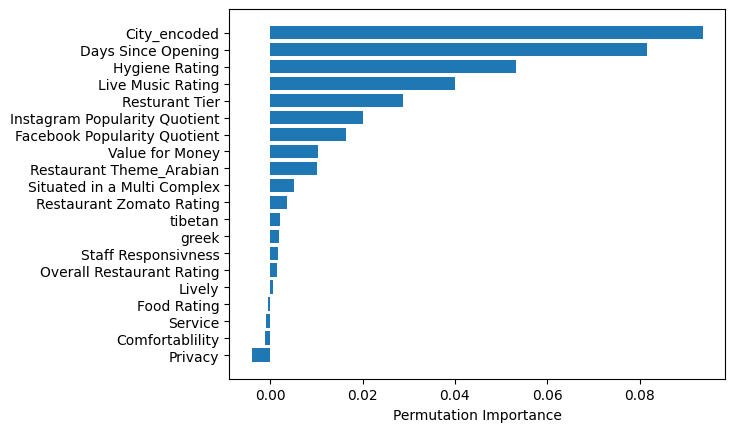

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(xgb_model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()


# Visualize permutation importance
plt.barh(X_val.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

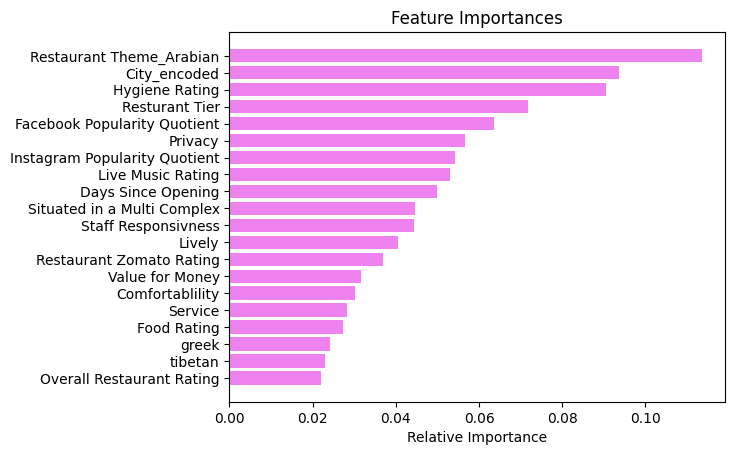

In [ ]:
feature_names = X_train.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)


plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_val)

# Calculate the performance metrics
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 380177071517175.56
Root Mean Squared Error (RMSE): 19498129.949232966
R^2 Score: 0.12477720178207352


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize the base estimator
base_estimator = DecisionTreeRegressor(max_depth=10)

# Initialize AdaBoost Regressor
ada_boost_model = AdaBoostRegressor(base_estimator=base_estimator,
                                    n_estimators=100,
                                    random_state=42,
                                    learning_rate=0.05)

# Fit the model on the training data
ada_boost_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_ada = ada_boost_model.predict(X_val)

# Calculate the performance metrics
rmse_ada = mean_squared_error(y_val, y_pred_ada, squared=False)
print(f"AdaBoost RMSE: {rmse_ada}")


AdaBoost RMSE: 19065208.179748747


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize Gradient Boosting Regressor
grad_boost_model = GradientBoostingRegressor(n_estimators=100,
                                             learning_rate=0.1,
                                             max_depth=3,
                                             random_state=42)

# Fit the model on the training data
grad_boost_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_grad = grad_boost_model.predict(X_val)

# Calculate the performance metrics
rmse_grad = mean_squared_error(y_val, y_pred_grad, squared=False)
print(f"Gradient Boosting RMSE: {rmse_grad}")


Gradient Boosting RMSE: 18889897.936723318


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge # An example meta-learner

# Define the base learners
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('ada', AdaBoostRegressor(random_state=42, n_estimators=1000, learning_rate=.05 )),
    ('gbr', GradientBoostingRegressor(random_state=42, n_estimators=1000, learning_rate=0.1, max_depth=3)),
    ('xgb', XGBRegressor(n_estimators=1000, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, max_depth=10, random_state=42))
]

# Initialize stacking ensemble
stacked_ensemble = StackingRegressor(
    estimators=base_learners,
    final_estimator=Ridge(), # Replace with choice of meta-learner
    cv=5,
    n_jobs=-1
)

# Fit the model on the training data
stacked_ensemble.fit(X_train, y_train)

# Predicting the Test set results
y_pred = stacked_ensemble.predict(X_val)

# Calculate the performance metrics
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"Stacked Ensemble RMSE: {rmse}")
print(f"Stacked Ensemble R^2: {r2}")


Stacked Ensemble RMSE: 19076969.758919448
Stacked Ensemble R^2: 0.16217853396070614


In [ ]:
# Define the features to keep
top_features = [
    'City_encoded', 'Days Since Opening', 'Live Music Rating', 'Hygiene Rating',
    'Instagram Popularity Quotient', 'Facebook Popularity Quotient', 'Staff Responsivness',
    'Privacy','Situated in a Multi Complex',
    'Resturant Tier',
    'Restaurant Theme_Arabian',
]


# Select only the chosen features, along with the target variable 'Annual Turnover'
train_top = train[top_features + ['Annual Turnover']]
test_top = test[top_features]  # Test set does not include the target

# now have new train and test datasets with only the selected features


In [ ]:
from sklearn.model_selection import train_test_split


X = train_top.drop(['Annual Turnover'], axis=1)  # Features
y = train_top['Annual Turnover']  # Target variable

# Splitting the dataset into the Training set and Test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
xgb_modeltop = xgb.XGBRegressor(
    n_estimators=1000,  # Increased number of trees
    max_depth=5,       # Increased depth for more complex patterns
    learning_rate=0.01,  # Lower learning rate for finer adjustments
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0,            # Default value
    min_child_weight=1, # Default value
    random_state=42

)

xgb_modeltop.fit(
    X_train, y_train,
    eval_metric="rmse",
    eval_set=[(X_val, y_val)],
    verbose=True,
    early_stopping_rounds=100  # More room to find improvement
)
# Predict and calculate RMSE
y_pred = xgb_model.predict(X_val)
rmse = mean_squared_error(y_val, y_pred, squared=False)
print(f"Second XGBoost RMSE: {rmse}")

[0]	validation_0-rmse:20826489.70859
[1]	validation_0-rmse:20799037.92468
[2]	validation_0-rmse:20778935.06677
[3]	validation_0-rmse:20750745.27422
[4]	validation_0-rmse:20725156.03218
[5]	validation_0-rmse:20700377.30380
[6]	validation_0-rmse:20677057.13364
[7]	validation_0-rmse:20649844.74194
[8]	validation_0-rmse:20624767.68428
[9]	validation_0-rmse:20603059.83954
[10]	validation_0-rmse:20585271.37995
[11]	validation_0-rmse:20565624.58627
[12]	validation_0-rmse:20542006.55103
[13]	validation_0-rmse:20515825.24627
[14]	validation_0-rmse:20495759.47089
[15]	validation_0-rmse:20476444.11609
[16]	validation_0-rmse:20451690.07431
[17]	validation_0-rmse:20435976.22688
[18]	validation_0-rmse:20416045.71026
[19]	validation_0-rmse:20395941.93076
[20]	validation_0-rmse:20372596.10132
[21]	validation_0-rmse:20359504.77346
[22]	validation_0-rmse:20336473.51550
[23]	validation_0-rmse:20313455.80691
[24]	validation_0-rmse:20289680.05643
[25]	validation_0-rmse:20267446.87440
[26]	validation_0-rmse

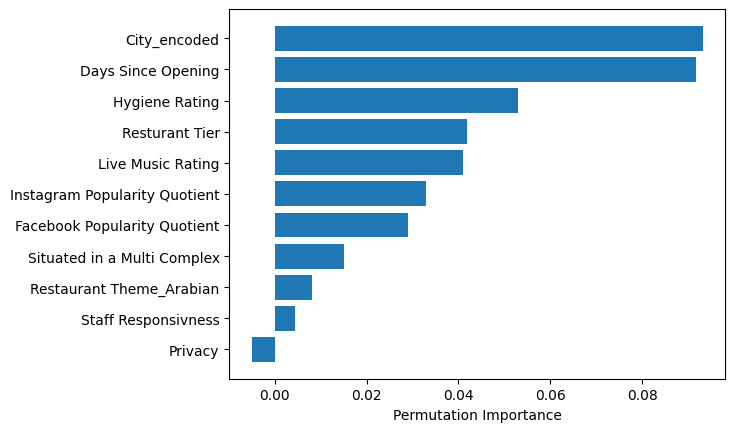

In [ ]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
perm_importance = permutation_importance(xgb_model, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1)

# Sort features by importance
sorted_idx = perm_importance.importances_mean.argsort()


# Visualize permutation importance
plt.barh(X_val.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

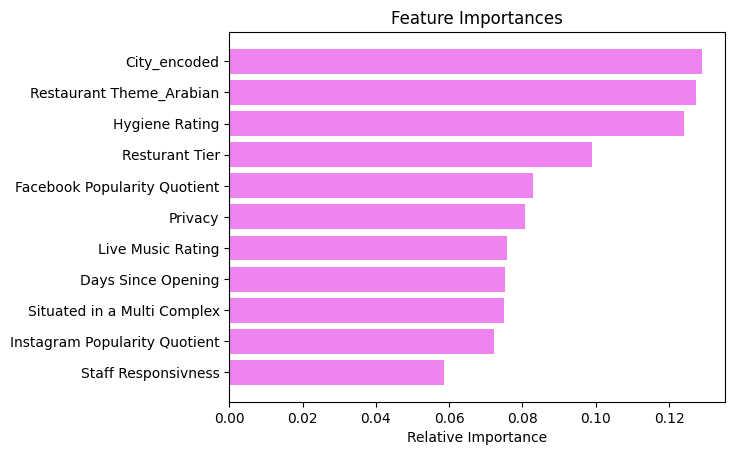

In [ ]:
feature_names = X_train.columns
importances = xgb_model.feature_importances_
indices = np.argsort(importances)


plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_val)

# Calculate the performance metrics
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 384162712333015.25
Root Mean Squared Error (RMSE): 19600069.192046624
R^2 Score: 0.11560167814091882


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize the base estimator
base_estimator = DecisionTreeRegressor(max_depth=10)

# Initialize AdaBoost Regressor
ada_boost_model = AdaBoostRegressor(base_estimator=base_estimator,
                                    n_estimators=100,
                                    random_state=42,
                                    learning_rate=0.05)

# Fit the model on the training data
ada_boost_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_ada = ada_boost_model.predict(X_val)

# Calculate the performance metrics
rmse_ada = mean_squared_error(y_val, y_pred_ada, squared=False)
print(f"AdaBoost RMSE: {rmse_ada}")


AdaBoost RMSE: 19120794.94000551


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize Gradient Boosting Regressor
grad_boost_model = GradientBoostingRegressor(n_estimators=100,
                                             learning_rate=0.1,
                                             max_depth=3,
                                             random_state=42)

# Fit the model on the training data
grad_boost_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_grad = grad_boost_model.predict(X_val)

# Calculate the performance metrics
rmse_grad = mean_squared_error(y_val, y_pred_grad, squared=False)
print(f"Gradient Boosting RMSE: {rmse_grad}")


Gradient Boosting RMSE: 19028313.798659608


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge # An example meta-learner

# Define the base learners
base_learners = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('ada', AdaBoostRegressor(random_state=42, n_estimators=1000, learning_rate=.05 )),
    ('gbr', GradientBoostingRegressor(random_state=42, n_estimators=1000, learning_rate=0.1, max_depth=3)),
    ('xgb', XGBRegressor(n_estimators=1000, learning_rate=0.01, subsample=0.8, colsample_bytree=0.8, max_depth=10, random_state=42))
]

# Initialize stacking ensemble
stacked_ensemble = StackingRegressor(
    estimators=base_learners,
    final_estimator=Ridge(), # Replace with choice of meta-learner
    cv=5,
    n_jobs=-1
)

# Fit the model on the training data
stacked_ensemble.fit(X_train, y_train)

# Predicting the Test set results
y_pred = stacked_ensemble.predict(X_val)

# Calculate the performance metrics
mse = mean_squared_error(y_val, y_pred)
rmse = mean_squared_error(y_val, y_pred, squared=False)
r2 = r2_score(y_val, y_pred)

print(f"Stacked Ensemble RMSE: {rmse}")
print(f"Stacked Ensemble R^2: {r2}")

Stacked Ensemble RMSE: 19206365.660555657
Stacked Ensemble R^2: 0.15077438213761574


In [ ]:
# Make sure the 'test' dataset is preprocessed in the same way as 'x_train'

# Predicting 'Annual Turnover' with the trained model
y_test_pred = xgb_modeltop.predict(test_top)

# Creating a submission DataFrame
submission = pd.DataFrame({
    'Registration Number': test['Registration Number'], # Assuming 'Registration Number' is a column in test set
    'Annual Turnover': y_test_pred
})

# Saving the predictions to a CSV file
submission.to_csv(('/content/drive/My Drive/colabnotebooks/Hackathon/submission.csv'), index=False)

# Output the path to the saved submission file
print("Submission file saved to: '/content/drive/My Drive/colabnotebooks/Hackathon/submission.csv'")


Submission file saved to: '/content/drive/My Drive/colabnotebooks/Hackathon/submission.csv'
